In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

#from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import r2_score

In [2]:
house_train_data = pd.read_csv('train.csv')
house_train_data.head() #head data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house_train_data = pd.read_csv('train.csv')
house_train_data.tail() #tail data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [4]:
house_train_data.info() #information of the data
#there are different data types here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#lets see our test data
test_data = pd.read_csv('test.csv')
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [6]:
print("The shape of the train data is: ", house_train_data.shape)
print("The shape of the test data  is : ", test_data.shape)

The shape of the train data is:  (1460, 81)
The shape of the test data  is :  (1459, 80)


### visualization

In [7]:
#from the info above we have int, object and float data types present
numeric_data = house_train_data.select_dtypes(['float64', 'int64'])
numeric_data.head(10) #dataframe containing only numeric data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,40,30,0,320,0,0,700,10,2009,143000
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,255,57,0,0,0,0,0,8,2007,307000
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,...,235,204,228,0,0,0,350,11,2009,200000
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,90,0,205,0,0,0,0,4,2008,129900
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,4,0,0,0,0,0,1,2008,118000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1BBCFCD0>,
      dtype=object)

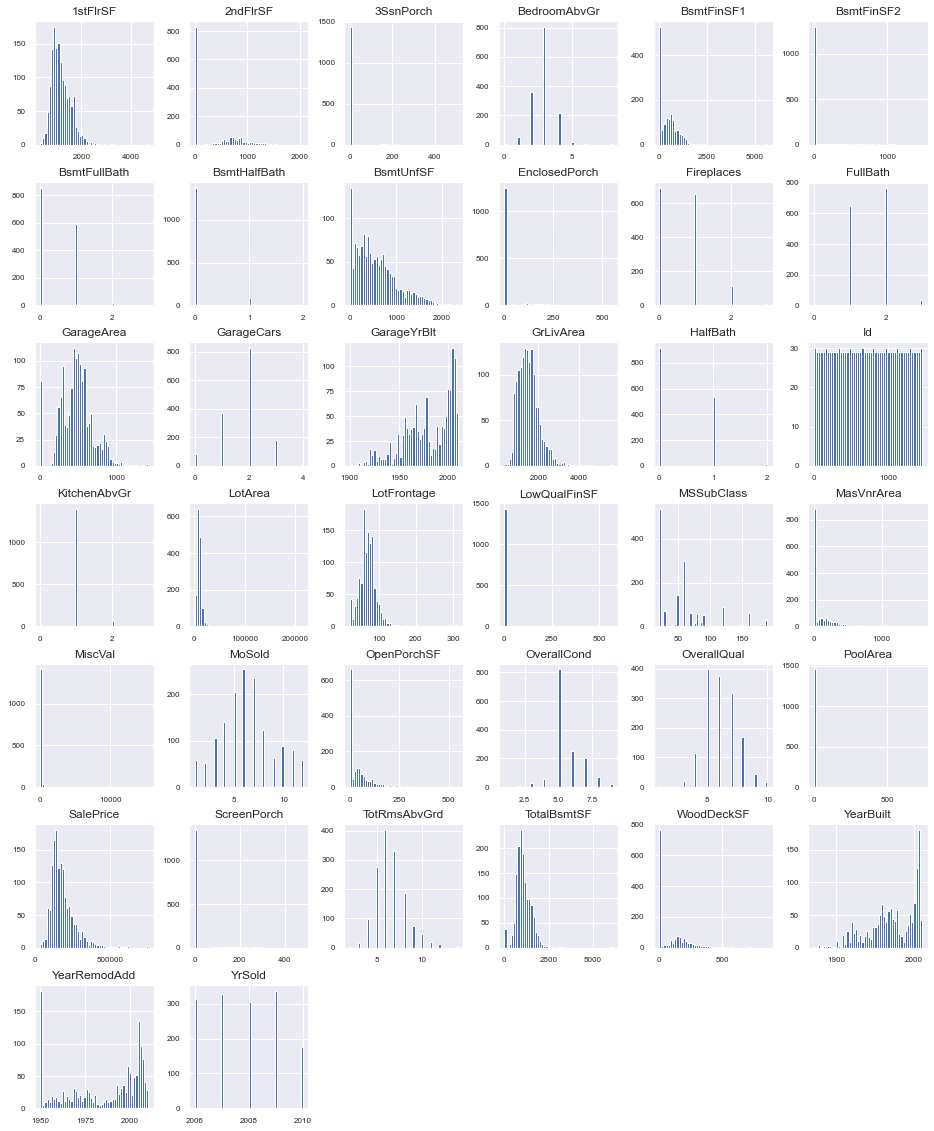

In [9]:
#visualizing the numeric data types using histogram
numeric_data.hist(figsize =(16, 20), bins = 50, xlabelsize = 8, ylabelsize = 8)
#E get why

In [10]:
#what we have as categorical data 
categorical_data = house_train_data.select_dtypes(['object'])
categorical_data

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


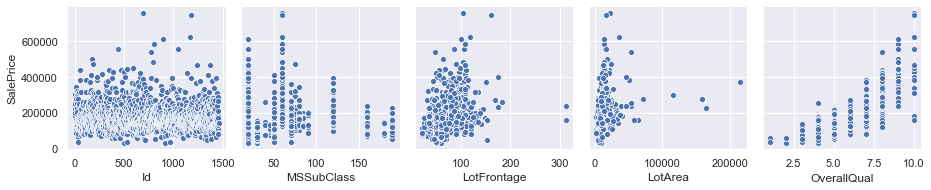

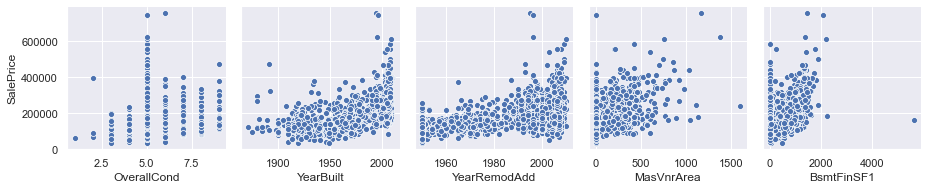

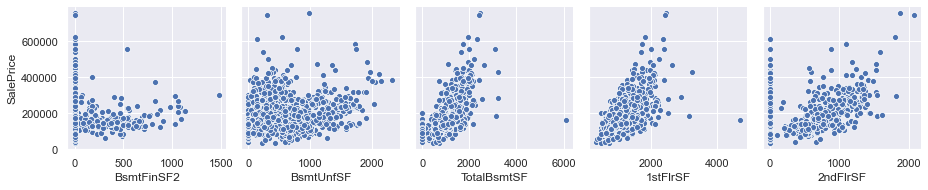

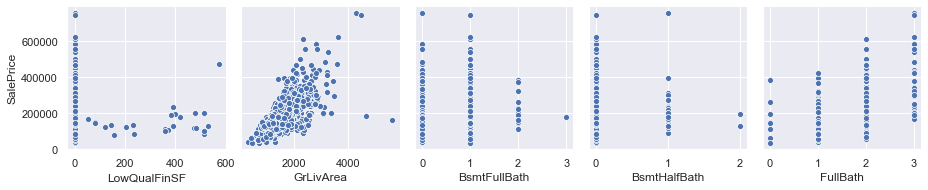

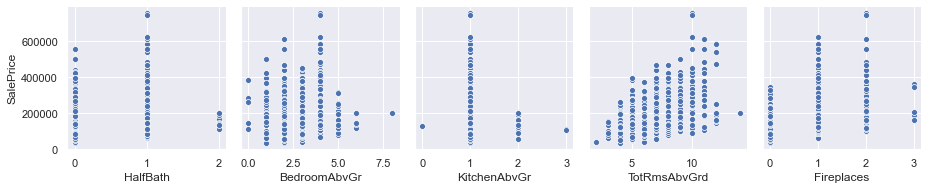

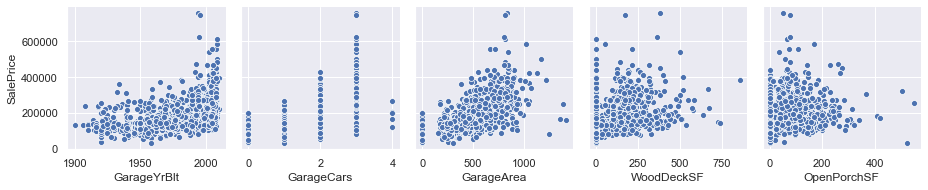

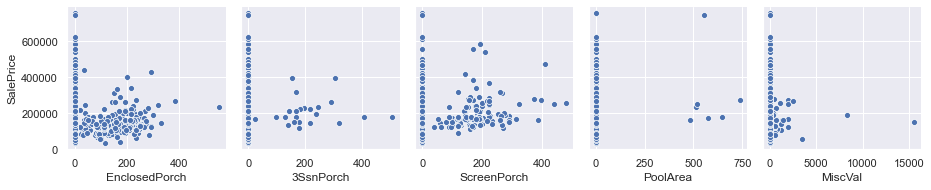

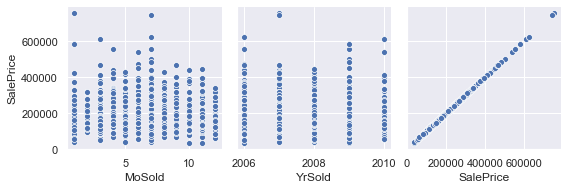

In [11]:
#plotting the numeric data against saleprice for more insights
#using scatter plots as it will help identify outliers
for i in range(0, len(numeric_data.columns), 5):
    sns.pairplot(data = numeric_data,
                x_vars = numeric_data.columns[i:i+5],
                y_vars = ['SalePrice'])


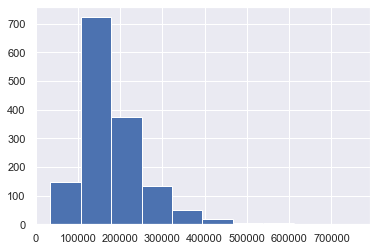

In [12]:
#lets look at the saleprice!!!

#plt.figure(figsize=(9,8))
house_train_data.SalePrice.skew()
plt.hist(house_train_data.SalePrice, color = 'b') #bins = 100, hist_kws = {'alpha':0.8})
plt.show()

In [13]:
#checking for the skewness of the target variable ie as visualized above
house_train_data.SalePrice.skew() #the old skew

1.8828757597682129

In [14]:
print("The saleprice median is", house_train_data.SalePrice.median())
print("The saleprice mean is", house_train_data.SalePrice.mean())

# data that is positively skewed has the mean greater than its median
#so the saleprice is positively skewed

The saleprice median is 163000.0
The saleprice mean is 180921.19589041095


0.12133506220520406


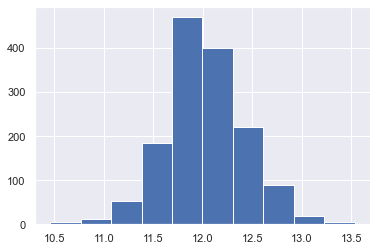

In [15]:
new_skew = np.log(house_train_data.SalePrice) #we will transform the saleprice
print(new_skew.skew())#the new skew
plt.hist(new_skew, color = 'b') 
plt.show()
#looks more like a normal distribution
#the skewness has been improved as it is closer to 0

### Correlation

In [16]:
corr = numeric_data.corr()
print(corr['SalePrice'].sort_values(ascending = False)[:5], '\n')
print(corr['SalePrice'].sort_values(ascending = False)[-5:])
#The first 5 are positively correlated, the last are negatively correlated to the saleprice

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


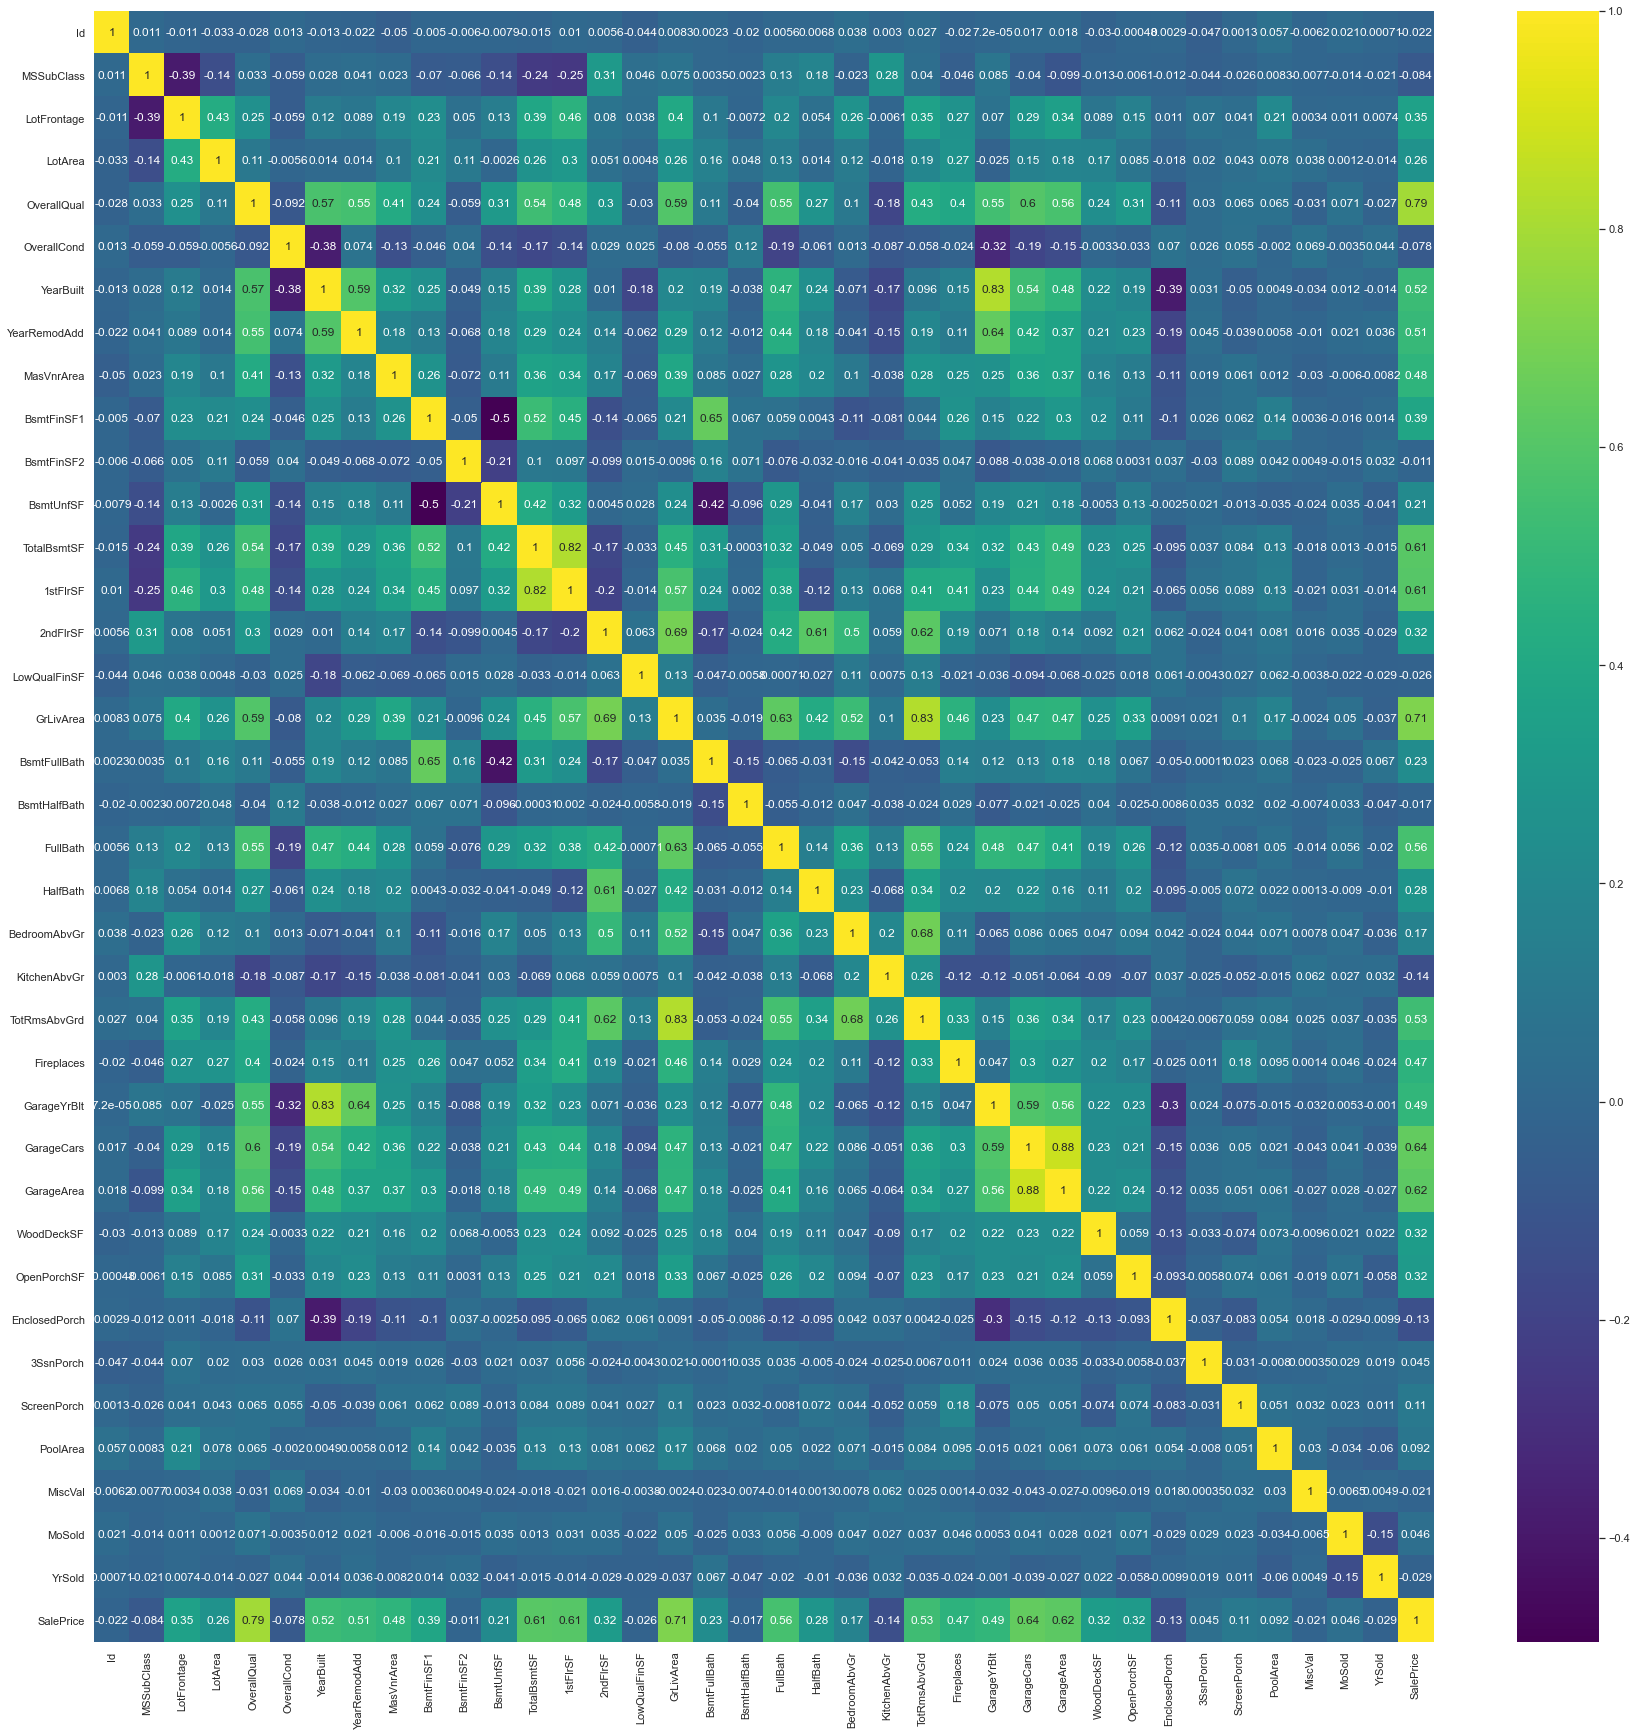

In [17]:
#get correlations of each features in dataset
corrmat = house_train_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(house_train_data[top_corr_features].corr(),annot=True,cmap="viridis")

In [18]:
#We can create a pivot table to further investigate the relationship between OverallQual and SalePrice
quality_pivot = house_train_data.pivot_table(index = 'OverallQual', values = 'SalePrice', aggfunc = np.median)
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


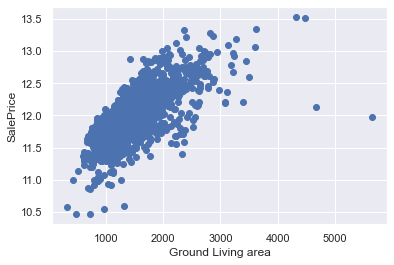

In [19]:
#let’s use plt.scatter() to generate some scatter plots and visualize the relationship between the
#Ground Living Area GrLivArea and SalePrice
plt.scatter(x = house_train_data['GrLivArea'], y =new_skew) #new_skew is the transformed saleprice
plt.ylabel('SalePrice')
plt.xlabel('Ground Living area')
plt.show()

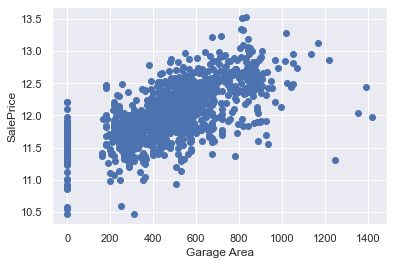

In [20]:
plt.scatter(x = house_train_data['GarageArea'], y =new_skew) #new_skew is the transformed saleprice
plt.ylabel('SalePrice')
plt.xlabel('Garage Area')
plt.show()

In [21]:
#will create a new dataframe with some outliers removed
house_train_data= house_train_data[house_train_data['GarageArea'] <1200] 

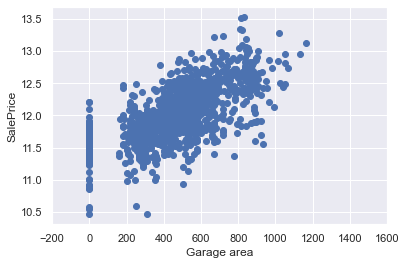

In [22]:
plt.scatter(x=house_train_data['GarageArea'], y = np.log(house_train_data.SalePrice))#x and y must be the same size
plt.xlim(-200, 1600) #this will force the same scale as the previous
plt.ylabel('SalePrice')
plt.xlabel('Garage area')
plt.show()
#looks better now
#NB: you can use a boxplot to remove outliers

In [26]:
### Null Values
null_value = pd.DataFrame(house_train_data.isnull().sum().sort_values(ascending = False)[:25])
null_value.columns = ['Null Count']
null_value.index.name = 'Feature'
null_value
# we return a Series of the counts of the null values in each column

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageQual,81
GarageCond,81
GarageFinish,81


In [27]:
### wrangling non numeric features 
categorical_data = house_train_data.select_dtypes(exclude=[np.number])
categorical_data.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


### Feature Engineering and Transformation
##### NB:
##### The transformation applied to the train should be applied to the test before fitting
##### shape of features from train should match those from test

In [23]:
#will use one hot encoding to transform our data to boolean

#here is the original data
print('Original data:', '\n') #original
print(house_train_data.Street.value_counts(), '\n')

Original data: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 



In [28]:
#encoding process
house_train_data['enc_street'] = pd.get_dummies(house_train_data.Street, drop_first = True)
test_data['enc_street'] = pd.get_dummies(house_train_data.Street, drop_first = True) #whatever is done to the train should be done to the test

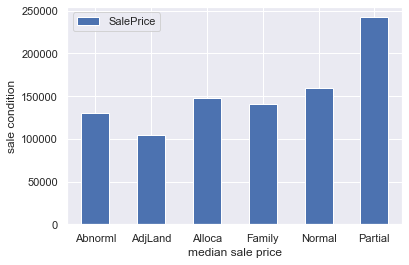

In [29]:
#Let’s try engineering another feature. We’ll look at SaleCondition by constructing and plotting a pivot table,
#as we did above for OverallQual

condition_pivot = house_train_data.pivot_table(index = 'SaleCondition', values = 'SalePrice', aggfunc = np.median)
condition_pivot.plot(kind = 'bar', color = 'b')
plt.ylabel('sale condition')
plt.xlabel('median sale price')
plt.xticks(rotation=0)
plt.show()

In [30]:
#Notice that Partial has a significantly higher Median Sale Price than the others. We will encode this as a new feature. 
#We select all of the houses where SaleCondition is equal to Patrial and assign the value 1, otherwise assign 0.

#Follow a similar method that we used for Street above.
def encode(x):
    return 1 if x == 'Partial' else 0
house_train_data['enc_condition'] = house_train_data.SaleCondition.apply(encode)
test_data['enc_condition'] = house_train_data.SaleCondition.apply(encode)

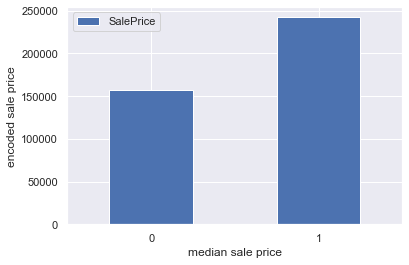

In [32]:
#Let’s explore this new feature as a plot.

condition_pivot = house_train_data.pivot_table(index = 'enc_condition', values='SalePrice', aggfunc = np.median)
condition_pivot.plot(kind ='bar', color = 'b')
plt.ylabel('encoded sale price')
plt.xlabel('median sale price')
plt.xticks(rotation=0)
plt.show()

In [34]:
#This looks great. You can continue to work with more features to improve the ultimate performance of your model.

#Before we prepare the data for modeling, we need to deal with the missing data.
#We’ll fill the missing values with an average value and then assign the results to data. 
#This is a method of interpolation. The DataFrame.interpolate() method makes this simple

data = house_train_data.select_dtypes(include = [np.number]).interpolate().dropna()
#Check if the all of the columns have 0 null values
sum(data.isnull().sum() != 0)

0

In [36]:
#Let’s perform the final steps to prepare our data for modeling
#We’ll separate the features and the target variable for modeling. 
#We will assign the features to X and the target variable to y. We use np.log()
#as explained above to transform the y variable for the model.

#We use np.log() as explained above to transform the y variable for the model. data.drop([features], axis=1)
#tells pandas wjjich columns we want to exclude

y = np.log(house_train_data.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis = 1)

### train_test_split() returns four objects:
#### X_train is the subset of our features used for training.
#### X_test is the subset which will be our ‘hold-out’ set – what we’ll use to test the model.
#### y_train is the target variable SalePrice which corresponds to X_train.
#### y_test is the target variable SalePrice which corresponds to X_test

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                   X, y, random_state = 42, test_size = .33 )


### Modelling

In [41]:
#We will first create a Linear Regression model. First, we instantiate the model
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [42]:
model = lr.fit(X_train, y_train)

### Evaluate the performance and visualize the results


In [44]:
print('R^2 is : \n', model.score(X_test, y_test))

R^2 is : 
 0.8882477709262525


In [45]:
#Next, we’ll consider rmse. To do so, use the model we have built to make predictions on the test data set
predictions =  model.predict(X_test)

In [46]:
#The model.predict() method will return a list of predictions given a set of predictors.
#Use model.predict() after fitting the model.

#The mean_squared_error function takes two arrays and calculates the rmse.
from sklearn.metrics import mean_squared_error
print("RSME is : \n", mean_squared_error(y_test, predictions))
      

RSME is : 
 0.01784179451956801


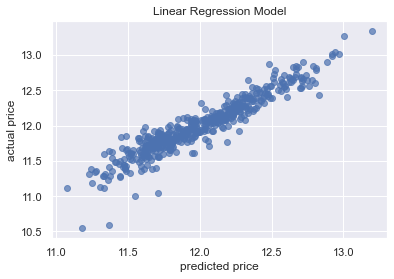

In [48]:
#interpreting this value is somewhat more intuitive that the r-squared value. 
#The RMSE measures the distance between our predicted values and actual values.

#We can view this relationship graphically with a scatter plot.
actual_values = y_test
plt.scatter(predictions, actual_values, alpha = .7, color='b') #alpha helps to show the overlapping data
plt.xlabel('predicted price')
plt.ylabel('actual price')
plt.title('Linear Regression Model')
plt.show()

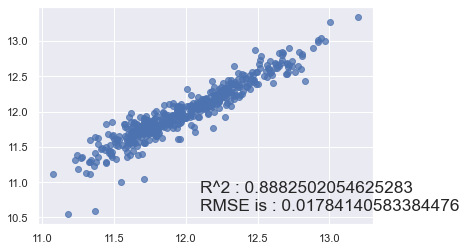

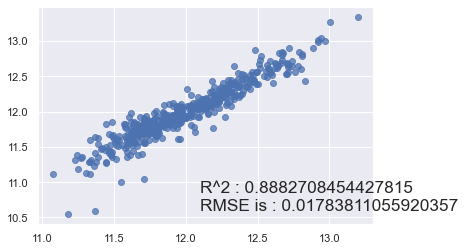

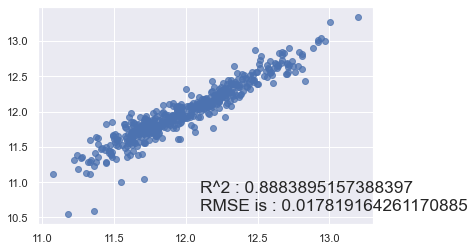

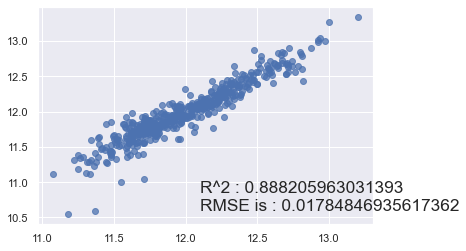

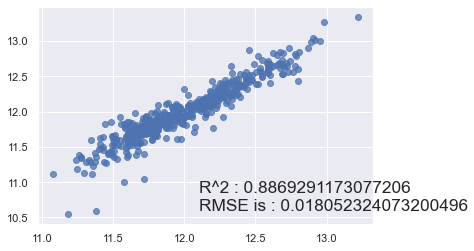

In [49]:
#If our predicted values were identical to the actual values, this graph would be the straight line y=x 
#because each predicted value x would be equal to each actual value y

#We’ll next try using Ridge Regularization to decrease the influence of less important features. 
#Ridge Regularization is a process which shrinks the regression coefficients of less important features.

#We’ll once again instantiate the model. The Ridge Regularization model takes a parameter, alpha , 
#which controls the strength of the regularization.

#We’ll experiment by looping through a few different values of alpha, and see how this changes our results.

for i in range (-2, 3):
    alpha = 10 ** i
    rm = linear_model.Ridge(alpha = alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    
    plt.scatter(preds_ridge, actual_values, alpha = .75, color='b')
    plt.xlabel = ('predicted price')
    plt.ylabel = ('Actual price')
    plt.title = ('Ridge regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 : {}\nRMSE is : {}'.format(ridge_model.score(X_test, y_test),
                                              mean_squared_error(y_test, preds_ridge))
    plt.annotate(s = overlay, xy= (12.1, 10.6), size = 'x-large')
    plt.show()
#In our case, adjusting the alpha did not substantially improve our model. As you add more features,
#regularization can be helpful. Repeat this step after you’ve added more features                                             

### Final Steps

In [51]:
### final steps
final_step = pd.DataFrame()
final_step['Id'] = test_data.Id

In [54]:
features = test_data.select_dtypes(include = [np.number]).drop(['Id'], axis = 1).interpolate()

In [55]:
#generate our predictions

predictions = model.predict(features)

In [56]:
#Now we’ll transform the predictions to the correct form. Remember that to reverse log() we do exp().
#So we will apply np.exp() to our predictions becasuse we have taken the logarithm previously
final_predictions = np.exp(predictions)

In [58]:
#the difference between the initial predictions and the final predictions
print("original predictions are \n", predictions[:5], "\n")
print("the final predictions are \n", final_predictions[:5])

original predictions are 
 [11.76725362 11.71929504 12.07656074 12.20632678 12.11217655] 

the final predictions are 
 [128959.49172585 122920.74024359 175704.82598102 200050.83263755
 182075.46986405]


In [64]:
#Assigning  these predictions 

final_step['SalePrice'] = final_predictions
final_step.head(100)

,Id,SalePrice
0,1461,128959.491726
1,1462,122920.740244
2,1463,175704.825981
3,1464,200050.832638
4,1465,182075.469864
...,...,...
95,1556,90697.885423
96,1557,97366.434933
97,1558,101610.802375
98,1559,78048.488690
